In [3]:
import requests
import pandas as pd
import os
from bs4 import BeautifulSoup
from newspaper import Article
from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [5]:
idx2word = {'101' : 'Economics', '102' : 'Society', '103' : 'Lifestyle/Culture', '105' : 'IT/Science'}

In [6]:
from newspaper import Article

# This is a function that generates dataframe.
def make_data(urllist, code):
  text_list = []
  for url in urllist:
    article = Article(url, language='ko')
    article.download()
    article.parse()
    text_list.append(article.text)

  #- Set values to the text under the key 'news' in the dataframe.
  df = pd.DataFrame({'news': text_list})

  #- Put category names under the key 'code' in the dataframe.
  df['code'] = idx2word[str(code)]
  return df

In [8]:
code_list = [102, 103, 105]

In [10]:
import os

csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.tail(10)

,news,code
5114,는 소비자로부터 월 이용료 1만~2만원을 받고 초고속 인터넷을 제공한다. 그런 SK...,IT/Science
5115,머리를 긁고 있는 오랑우탄. 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이...,IT/Science
5116,가 오는 15일 정식 출시하는 스마트폰 'LG벨벳'이 사실상 '공짜폰'이 될 전망이...,IT/Science
5117,이미지제공=게티이미지뱅크 이미지제공=게티이미지뱅크\n\n[Copyright ⓒ 전자...,IT/Science
5118,국내 제약바이오사가 신종 코로나바이러스 감염증(코로나19) 사태 이후 첫 실적발표에...,IT/Science
5119,신종 코로나바이러스 감염증(코로나19) 사태 이후 ‘가정의 달’ 5월에도 언택트(비...,IT/Science
5120,는 소비자로부터 월 이용료 1만~2만원을 받고 초고속 인터넷을 제공한다. 그런 SK...,IT/Science
5121,머리를 긁고 있는 오랑우탄. 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이...,IT/Science
5122,가 오는 15일 정식 출시하는 스마트폰 'LG벨벳'이 사실상 '공짜폰'이 될 전망이...,IT/Science
5123,이미지제공=게티이미지뱅크 이미지제공=게티이미지뱅크\n\n[Copyright ⓒ 전자...,IT/Science


In [11]:
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # Remove characters other than Korean using regular expression. 

In [12]:
# Check if null data is in the sample.
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [13]:
# Remove every duplicated sample.
df.drop_duplicates(subset=['news'], inplace=True)
print('Number of news after removal process: ',len(df))

Number of news after removal process:  3994


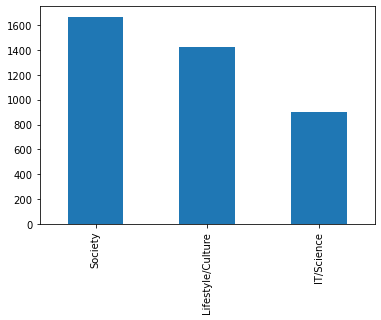

In [14]:
df['code'].value_counts().plot(kind = 'bar')


In [15]:
print(df.groupby('code').size().reset_index(name = 'count'))

                code  count
0         IT/Science    903
1  Lifestyle/Culture   1423
2            Society   1668


In [16]:
from konlpy.tag import Mecab
#tokenizer = Mecab()
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [17]:
#Altering the tokeniser method
from konlpy.tag import Hannanum, Kkma
#tokenizer = Hannanum()
tokenizer = Kkma()

In [18]:
# Tokenise and discard stopwords.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- Tokenise
    temp_data = tokenizer.morphs(sentence) 
    #- discard stopwords
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [60]:
text_data = preprocessing(df['news'])
#print(text_data[0])

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [42]:
# Data partition
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], test_size = 0.2, random_state = 0)

In [43]:
print('Number of news for training :', len(X_train))
print('Number of news for testing : ', len(X_test))
print('Number of labels for training : ', len(y_train))
print('Number of labels for testing : ', len(y_test))

Number of news for training : 3195
Number of news for testing :  799
Number of labels for training :  3195
Number of labels for testing :  799


In [50]:
#- Count vectoriser which counts the number of words.(Like TF)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
#print(X_train_counts)
#print(X_train_counts.shape)

#- Receive TF-IDF from the result of count vectoriser.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)
print(X_train_tfidf)


#- Execute Naive bayes classifier.
#- X_train : TF-IDF vector, y_train : label.
clf = MultinomialNB().fit(X_train_tfidf, y_train)
#print(clf)

(3195, 26838)
  (0, 26646)	0.059640431247834254
  (0, 26471)	0.09166921289410415
  (0, 26383)	0.053765063905626284
  (0, 26368)	0.04013968635157613
  (0, 26306)	0.038085982816089214
  (0, 25728)	0.12104970371705405
  (0, 25586)	0.07056314781650644
  (0, 25573)	0.044539279522087916
  (0, 25363)	0.04007540222498938
  (0, 25183)	0.07158553044779477
  (0, 25103)	0.04362550153275062
  (0, 24552)	0.0641962296046239
  (0, 23961)	0.08874292274069209
  (0, 23017)	0.02504218905961791
  (0, 22403)	0.0390875331386856
  (0, 22134)	0.052799723276252736
  (0, 21942)	0.07571748299080505
  (0, 21442)	0.059640431247834254
  (0, 21352)	0.053674309664089585
  (0, 21180)	0.09891416547781748
  (0, 21174)	0.09957819768286276
  (0, 21107)	0.13114847698195087
  (0, 21007)	0.03867768929696792
  (0, 21000)	0.057446893080468714
  (0, 20770)	0.04978909884143138
  :	:
  (0, 5523)	0.08032569223605264
  (0, 5509)	0.09544185705509728
  (0, 5323)	0.02644994589129344
  (0, 5008)	0.05815933797306284
  (0, 4932)	0.0723142

In [51]:
# Processing function which automatically converts into TF-IDF.
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

In [52]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])

print(clf.predict(tfidf_vectorizer(new_sent)))

['Society']


In [53]:
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['Lifestyle/Culture']


In [54]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/Science']


In [55]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

       IT/Science       0.93      0.75      0.83       186
Lifestyle/Culture       0.81      0.79      0.80       264
          Society       0.81      0.91      0.86       349

         accuracy                           0.83       799
        macro avg       0.85      0.82      0.83       799
     weighted avg       0.84      0.83      0.83       799

